In [13]:
library(treeio)
library(ggtree)
library(ggplot2)
library(ape)
library(ComplexHeatmap)
library(cowplot)
library(circlize)
library(ggtreeExtra)
library(ggnewscale)

library(ape)
library(tidytree)
library(dplyr)
library(tidyr)

Warning message:
“package ‘tidyr’ was built under R version 4.3.3”

Attaching package: ‘tidyr’


The following object is masked from ‘package:ggtree’:

    expand




# tree plot

In [2]:
cell_lineage <- read.table('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/cell_lineage.T1_T2_T3a.csv',header = T,row.names = 1,sep=',')
color_df <- read.csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/color_lineage_dict.csv',header=T,sep=',',row.names=1,check.names = F)
colnames(color_df) = 'color'
rownames(color_df) = paste0('C',as.character(rownames(color_df)))
color_df['C1','color'] <- '#fa9fb5'
color_df

,color
,<chr>
C1,#fa9fb5
C5,#EE00EE
C2,#8B3A3A
C3,#8B8B83
C4,#FFF8DC
C7,#9AFF9A
C8,#AB82FF
C19,#EE5C42
C6,#9400D3


In [3]:
metadata <- read.table('/syn1/liangzhen/jinhua_jilab_project/result/scRNA/cellranger/metadata.T1_T2_T3a.harmony.final.refine.csv',sep=',',header=T,row.names=1)
rownames(metadata) <- metadata$cellName

df_alleles <- read.table('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/trees/clones_tree_merged/10_trees.csv',header = T,sep=',',row.names=1,check.names = F)
df_alleles_test <- as.data.frame(apply(df_alleles, 2, as.character))
rownames(df_alleles_test) <- rownames(df_alleles)

file = '10_trees.phy.treefile'
tree <- read.tree(paste0('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/trees/clones_tree_merged/polytomy/',file))
tree <- root(tree, outgroup = "synthetic", resolve.root = TRUE)
tree <- drop.tip(tree,tree$tip.label[!(tree$tip.label %in% metadata$cellName)])
tree_plot <- ggtree(tree)
tree_plot$data$cluster <- 'Root'
tree_plot$data[tree_plot$data$isTip==TRUE & tree_plot$data$label!='synthetic','cluster'] <- as.character(metadata[tree_plot$data$label[tree_plot$data$isTip==TRUE & tree_plot$data$label!='synthetic'],'seurat_clusters_rename'])

tree_plot$data$time <- 'Root'
tree_plot$data[tree_plot$data$isTip==TRUE & tree_plot$data$label!='synthetic','time'] <- as.character(metadata[tree_plot$data$label[tree_plot$data$isTip==TRUE & tree_plot$data$label!='synthetic'],'time'])

tree_plot$data$clone <- 'Root'
tree_plot$data[tree_plot$data$isTip==TRUE & tree_plot$data$label!='synthetic','clone'] <- paste0('C',as.character(cell_lineage[tree_plot$data$label[tree_plot$data$isTip==TRUE & tree_plot$data$label!='synthetic'],'lineageGrp']))

options(repr.plot.width=10, repr.plot.height=10)
group_info <- split(tree_plot$data$label[tree_plot$data$isTip==TRUE], tree_plot$data$clone[tree_plot$data$isTip==TRUE])
tree_grouped <- groupOTU(tree, group_info)
tree_plot <- ggtree(tree_grouped,branch.length = 1,aes(color=group)) + geom_tree(size = 0.5)+
    scale_color_manual(breaks=c('Root',unique(tree_plot$data$clone[tree_plot$data$isTip==TRUE & tree_plot$data$label!='synthetic'])),
                      values=c('gray',color_df[unique(tree_plot$data$clone[tree_plot$data$isTip==TRUE & tree_plot$data$label!='synthetic']),'color']))+ guides(color = FALSE) 

tree_plot$data$cluster <- 'Root'
tree_plot$data[tree_plot$data$isTip==TRUE & tree_plot$data$label!='synthetic','cluster'] <- as.character(metadata[tree_plot$data$label[tree_plot$data$isTip==TRUE & tree_plot$data$label!='synthetic'],'seurat_clusters_rename'])

tree_plot$data$time <- 'Root'
tree_plot$data[tree_plot$data$isTip==TRUE & tree_plot$data$label!='synthetic','time'] <- as.character(metadata[tree_plot$data$label[tree_plot$data$isTip==TRUE & tree_plot$data$label!='synthetic'],'time'])

tree_plot$data$clone <- 'Root'
tree_plot$data[tree_plot$data$isTip==TRUE & tree_plot$data$label!='synthetic','clone'] <- paste0('C',as.character(cell_lineage[tree_plot$data$label[tree_plot$data$isTip==TRUE & tree_plot$data$label!='synthetic'],'lineageGrp']))



Warning message:
“The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as
of ggplot2 3.3.4.”


Warning message:
“The column of x aesthetic only have one unique value with `geom = geom_tile`,
and the `width` of `geom_tile()` is not provided, the `pwidth` will be as
`width`.”
Warning message:
“The column of x aesthetic only have one unique value with `geom = geom_tile`,
and the `width` of `geom_tile()` is not provided, the `pwidth` will be as
`width`.”
Warning message:
“The column of x aesthetic only have one unique value with `geom = geom_tile`,
and the `width` of `geom_tile()` is not provided, the `pwidth` will be as
`width`.”


png 
  2

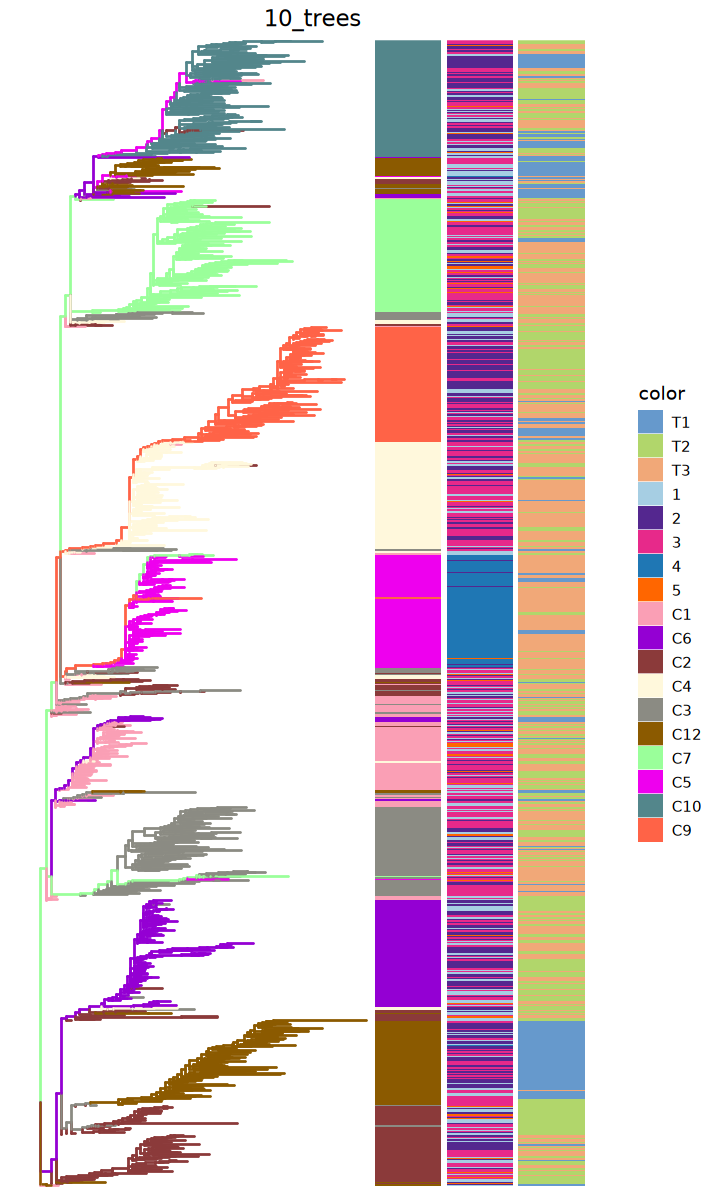

In [4]:
options(repr.plot.width=6, repr.plot.height=10)
plot <- tree_plot +
        new_scale_fill() +
         geom_fruit(
             geom=geom_tile,
             mapping=aes(fill=clone),
             pwidth=max(tree_plot$data$x)*0.20,
             offset=0.13
         ) +         
        geom_fruit(
             geom=geom_tile,
             mapping=aes(fill=cluster),
             pwidth=max(tree_plot$data$x)*0.20,
             offset=0.22
         ) + 
         geom_fruit(
             geom=geom_tile,
             mapping=aes(fill=time),
             pwidth=max(tree_plot$data$x)*0.20,
             offset=0.22
         ) + 
          scale_fill_manual(
                 name="color",
                 breaks=c('T1','T2','T3','1','2','3','4','5','Root',unique(tree_plot$data$clone[tree_plot$data$isTip==TRUE & tree_plot$data$label!='synthetic'])),
                 values=c('#6699CC','#B1D66B','#F1A878','#a6cee3','#54278f','#e7298a','#1f77b4','#ff6600','gray',color_df[unique(tree_plot$data$clone[tree_plot$data$isTip==TRUE & tree_plot$data$label!='synthetic']),'color']),
                 guide=guide_legend(keywidth=1, keyheight=1, ncol=1)
         ) + 
    ggtitle(gsub('cell_mutation_matrix-|.phy.treefile','',file)) + theme(plot.title = element_text(hjust = 0.5))
pdf('/syn1/liangzhen/jinhua_jilab_project/result/Figures/Figure2/clone_tree_merged.pdf',width=6,height=10)
print(plot)
dev.off()
print(plot)

In [14]:
cell_lineage <- read.table('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/cell_lineage.T1_T2_T3a.csv',header = T,row.names = 1,sep=',')
color_df <- read.csv('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/color_lineage_dict.csv',header=T,sep=',',row.names=1,check.names = F)
colnames(color_df) = 'color'
rownames(color_df) = paste0('C',as.character(rownames(color_df)))
color_df['C1','color'] <- '#fa9fb5'
color_df

,color
,<chr>
C1,#fa9fb5
C5,#EE00EE
C2,#8B3A3A
C3,#8B8B83
C4,#FFF8DC
C7,#9AFF9A
C8,#AB82FF
C19,#EE5C42
C6,#9400D3


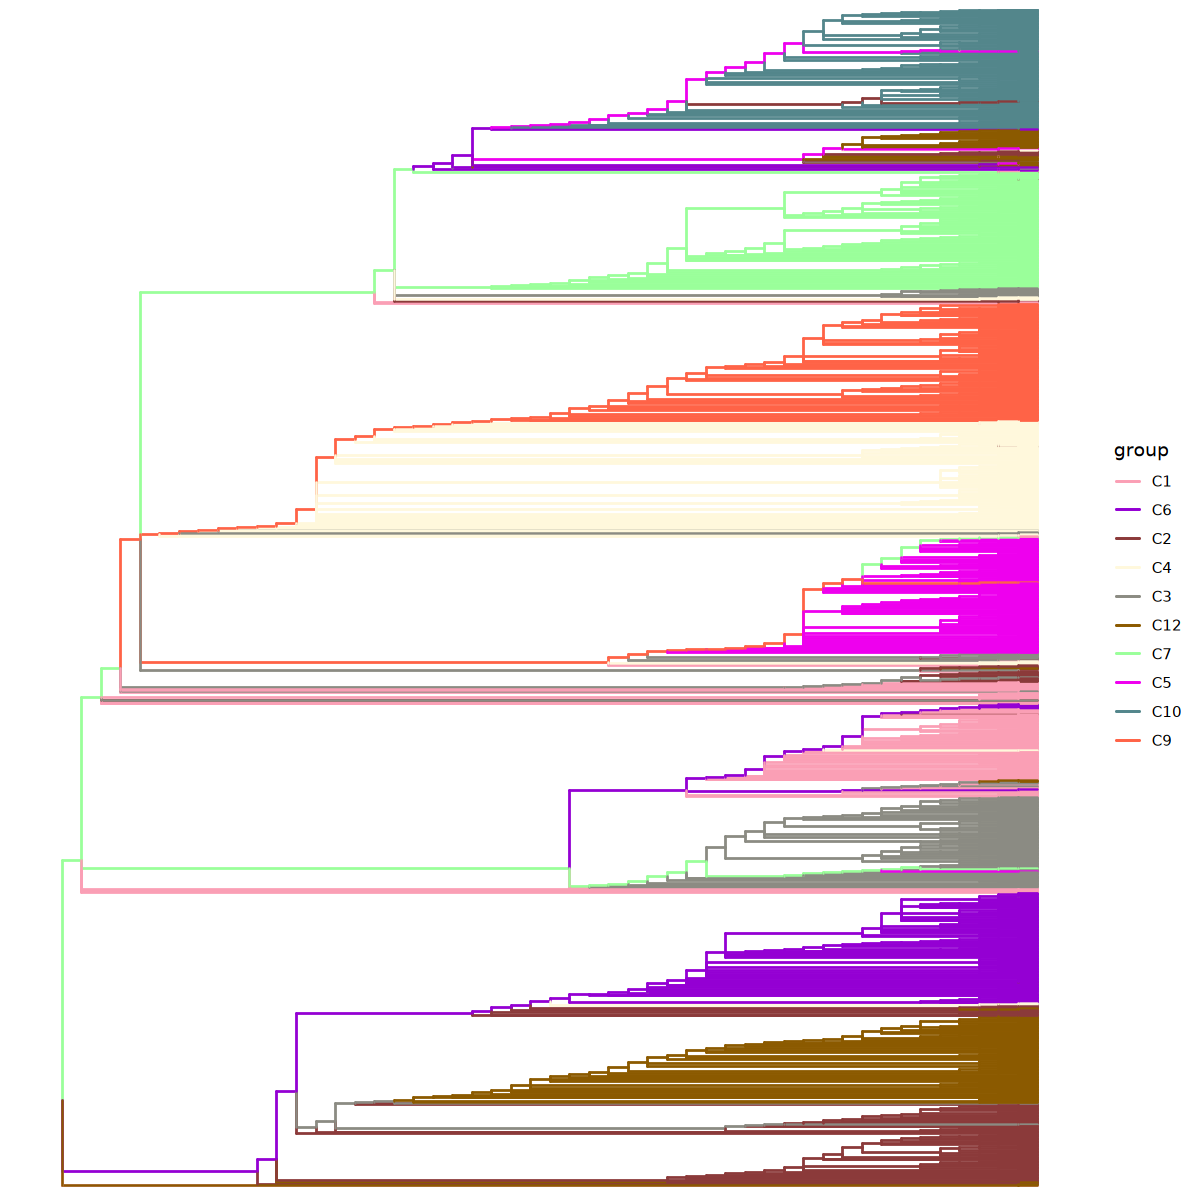

In [15]:
metadata <- read.table('/syn1/liangzhen/jinhua_jilab_project/result/scRNA/cellranger/metadata.T1_T2_T3a.harmony.final.refine.csv',sep=',',header=T,row.names=1)
rownames(metadata) <- metadata$cellName

file = '10_trees.phy.treefile'
tree <- read.tree(paste0('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/trees/clones_tree_merged/polytomy/',file))
tree <- root(tree, outgroup = "synthetic", resolve.root = TRUE)
tree <- drop.tip(tree,tree$tip.label[!(tree$tip.label %in% metadata$cellName)])

options(repr.plot.width=10, repr.plot.height=10)
group_info <- split(tree$tip.label, paste0('C',cell_lineage[tree$tip.label,'lineageGrp']))
tree_grouped <- groupOTU(tree, group_info)
tree_plot <- ggtree(tree_grouped,branch.length = 'none',aes(color=group)) + geom_tree(size = 0.5)+ theme_tree() +
    scale_color_manual(breaks=c('Root',unique(paste0('C',cell_lineage[tree$tip.label,'lineageGrp']))),
                      values=c('gray',color_df[unique(paste0('C',cell_lineage[tree$tip.label,'lineageGrp'])),'color']))#+ guides(color = FALSE) 
tree_plot

In [16]:
tree_data <- tree_plot$data[tree_plot$data$isTip==TRUE,]
tree_data <- tree_data[order(tree_data$y,decreasing = T),] 

In [17]:
df_alleles <- read.table('/syn1/liangzhen/jinhua_jilab_project/result/DNA_Amplicon/trees/clones_tree_merged/10_trees.csv',header = T,sep=',',row.names=1,check.names = F)
df_alleles_test <- as.data.frame(apply(df_alleles, 2, as.character))
rownames(df_alleles_test) <- rownames(df_alleles)
df_alleles_test <- df_alleles_test[tree_data$label,]
colnames(df_alleles_test) <- seq(1:976)

In [18]:
df_alleles_test$index <- rownames(df_alleles_test)
df_alleles_test

,1,2,3,4,5,6,7,8,9,10,⋯,968,969,970,971,972,973,974,975,976,index
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
T2_a3026_1_CTAGGTATCTCTCTTC,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,T2_a3026_1_CTAGGTATCTCTCTTC
T3_a3028_1_1_CCGAACGAGCGTTGTT,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,T3_a3028_1_1_CCGAACGAGCGTTGTT
T2_a3026_2_CAACGATTCCATAGAC,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,T2_a3026_2_CAACGATTCCATAGAC
T2_a3026_2_CCTCATGAGCATATGA,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,T2_a3026_2_CCTCATGAGCATATGA
T3_a3026_2_1_GATAGAAGTAGAGCTG,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,T3_a3026_2_1_GATAGAAGTAGAGCTG
T2_a3026_2_CTTTCGGAGCACACCC,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,T2_a3026_2_CTTTCGGAGCACACCC
T3_a3026_2_1_TGTTGGATCCTGTAGA,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,T3_a3026_2_1_TGTTGGATCCTGTAGA
T3_a3026_2_1_CCACAAATCCCGAGGT,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,T3_a3026_2_1_CCACAAATCCCGAGGT
T3_a3026_2_1_CTCCACATCACCCTGT,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,T3_a3026_2_1_CTCCACATCACCCTGT


In [19]:

df_alleles_test <- as.data.frame(pivot_longer(df_alleles_test,names_to = 'location',values_to = 'mutation',cols = -index))
df_alleles_test <- df_alleles_test[df_alleles_test$mutation != 0,]
df_alleles_test$location <- as.numeric(df_alleles_test$location)
snp_data <- df_alleles_test
snp_data

,index,location,mutation
,<chr>,<dbl>,<chr>
90,T2_a3026_1_CTAGGTATCTCTCTTC,90,1
117,T2_a3026_1_CTAGGTATCTCTCTTC,117,1
163,T2_a3026_1_CTAGGTATCTCTCTTC,163,1
194,T2_a3026_1_CTAGGTATCTCTCTTC,194,1
205,T2_a3026_1_CTAGGTATCTCTCTTC,205,1
206,T2_a3026_1_CTAGGTATCTCTCTTC,206,1
228,T2_a3026_1_CTAGGTATCTCTCTTC,228,1
237,T2_a3026_1_CTAGGTATCTCTCTTC,237,1
238,T2_a3026_1_CTAGGTATCTCTCTTC,238,1


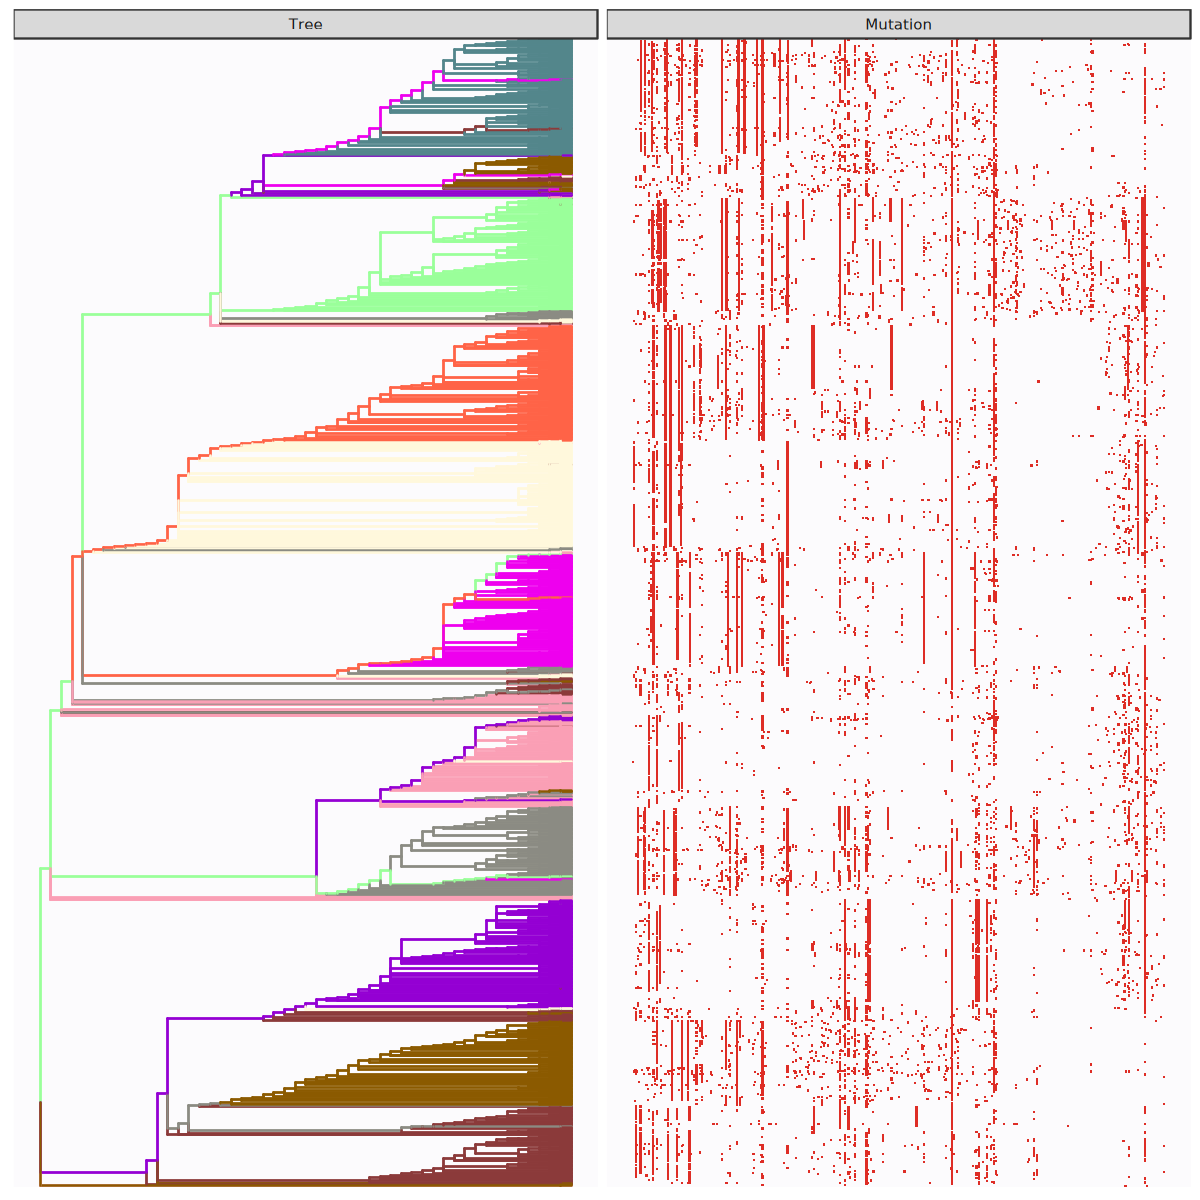

In [20]:
library(ggtree)
library(ggplot2)
library(ggnewscale)    # 如果你想在不同panel使用不同颜色映射
library(dplyr)

groups <- paste0("C", cell_lineage[tree$tip.label, 'lineageGrp'])
unique_groups <- unique(groups)
group_colors <- color_df[unique_groups, 'color']

# 基础树图
p <- ggtree(tree_grouped, branch.length = 'none', aes(color = group)) +
  geom_tree(size = 0.5) +
  theme_tree() +
  scale_color_manual(
    breaks = c('Root', unique_groups),
    values = c('gray', group_colors)
  ) +
  guides(color = FALSE)


plot <- p + geom_facet(
  panel = "Mutation",
  data = snp_data, 
  geom = geom_point,
  mapping = aes(x = location),  # 不使用 color = mutation 避免色彩混乱
  shape = '.',
  color = '#de2d26'               # 明确设定颜色
)+theme(
    panel.background = element_rect(fill = "#fcfbfd", color = NA),
    #plot.background = element_rect(fill = "#f0f0f0", color = NA),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    axis.title = element_blank(),        # 去掉坐标轴标题
    axis.text = element_blank(),         # 去掉坐标轴刻度文本
    axis.ticks = element_blank(),        # 去掉坐标轴刻度线
    axis.line = element_blank()          # 去掉坐标轴线条
  )
plot
#ggsave(plot,file='/syn1/liangzhen/jinhua_jilab_project/result/Figures/Figure2/10clone_merged_mutation_heatmap.pdf',width=20,height=20)

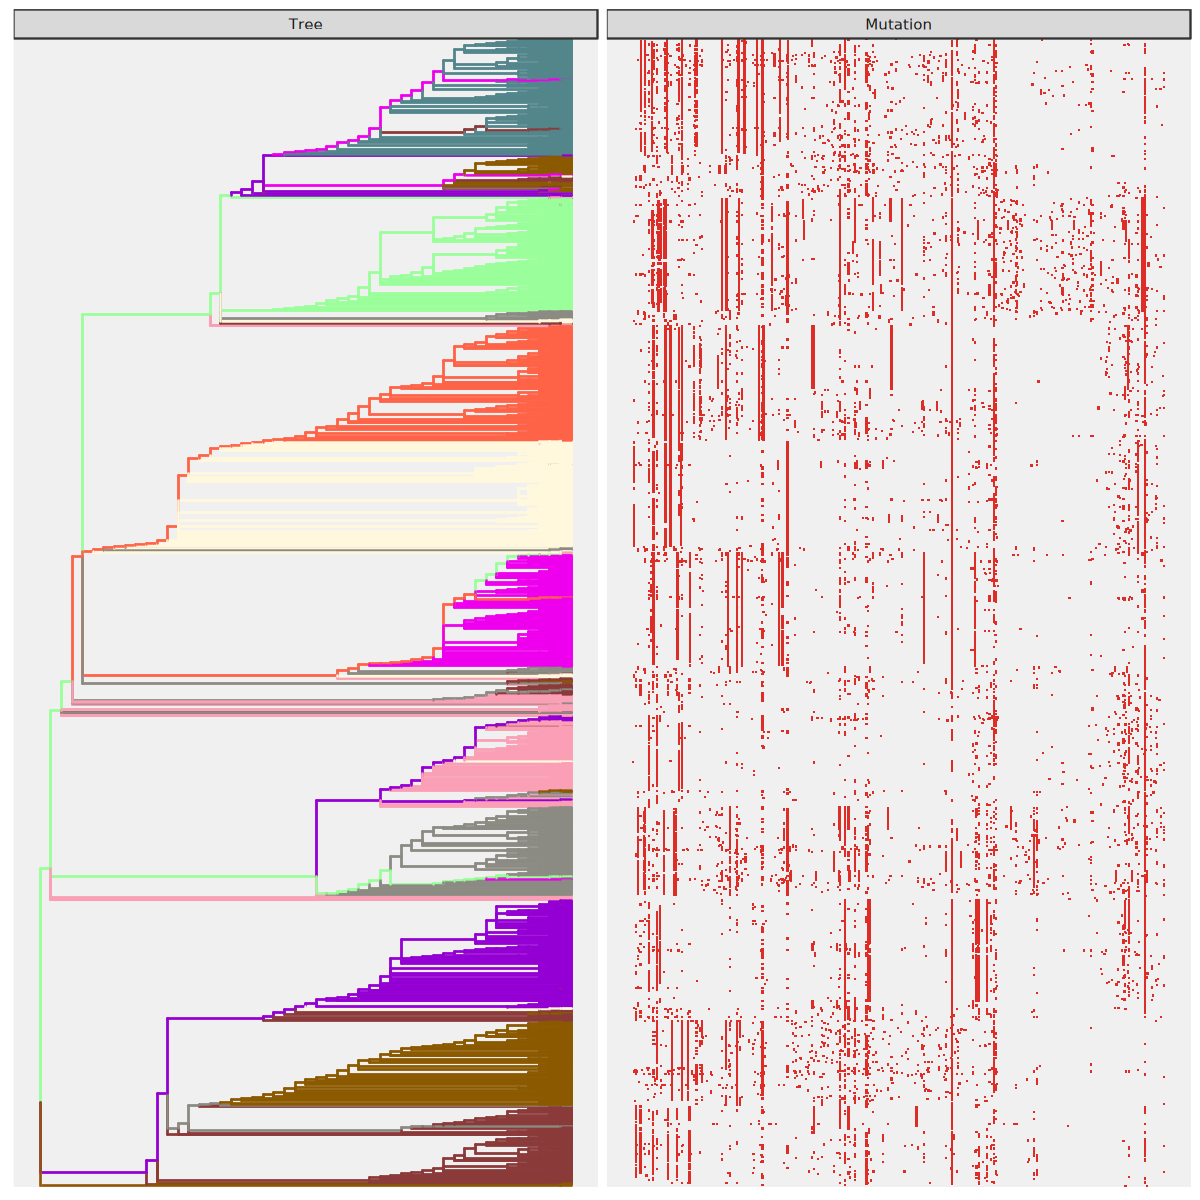

In [21]:
library(ggtree)
library(ggplot2)
library(ggnewscale)    # 如果你想在不同panel使用不同颜色映射
library(dplyr)

groups <- paste0("C", cell_lineage[tree$tip.label, 'lineageGrp'])
unique_groups <- unique(groups)
group_colors <- color_df[unique_groups, 'color']

# 基础树图
p <- ggtree(tree_grouped, branch.length = 'none', aes(color = group)) +
  geom_tree(size = 0.5) +
  theme_tree() +
  scale_color_manual(
    breaks = c('Root', unique_groups),
    values = c('gray', group_colors)
  ) +
  guides(color = FALSE)


plot <- p + geom_facet(
  panel = "Mutation",
  data = snp_data, 
  geom = geom_point,
  mapping = aes(x = location),  # 不使用 color = mutation 避免色彩混乱
  shape = '.',
  color = '#de2d26'               # 明确设定颜色
)+theme(
    panel.background = element_rect(fill = "#f0f0f0", color = NA),
    #plot.background = element_rect(fill = "#f0f0f0", color = NA),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    axis.title = element_blank(),        # 去掉坐标轴标题
    axis.text = element_blank(),         # 去掉坐标轴刻度文本
    axis.ticks = element_blank(),        # 去掉坐标轴刻度线
    axis.line = element_blank()          # 去掉坐标轴线条
  )
plot
#ggsave(plot,file='/syn1/liangzhen/jinhua_jilab_project/result/Figures/Figure2/10clone_merged_mutation_heatmap_2.pdf',width=20,height=20)

# qualtify tree clustering

In [26]:
tree_data <- tree_plot$data[tree_plot$data$isTip==TRUE,]
tree_data <- tree_data[order(tree_data$y,decreasing = T),] 

In [28]:
count_all <- 0 
mask_0 <- rep(0,length(tree_data$group))
gaps_all <- c()
for (group in unique(tree_data$group)){
    mask_0[tree_data$group == group] <- 1
    
x <- mask_0

ones_pos <- which(x == 1)


if (length(ones_pos) < 2) {
  cat("none")
} else {
  
  gaps <- diff(ones_pos)
  
  groups <- list()
  current_group <- ones_pos[1]
  
  for (i in seq_along(gaps)) {
    if (gaps[i] < 10) {
      current_group <- c(current_group, ones_pos[i + 1])
    } else {
      groups[[length(groups) + 1]] <- current_group
      current_group <- ones_pos[i + 1]
    }
  }
  
  groups[[length(groups) + 1]] <- current_group
  
  
  valid_regions <- lapply(groups, function(g) {
    if (length(g) > 10) {
      return(seq(min(g), max(g)))  
    } else {
      return(NULL)
    }
  })
  
  
  valid_regions <- Filter(Negate(is.null), valid_regions)
  group_index <- unlist(valid_regions)
  count_all <- count_all + length(which(tree_data$group[group_index]==group))

}    
  mask_0 <- rep(0,length(tree_data$group))
    
}

count_all/length(tree_data$group)

[1] 0.945336